# Logistic Regression
- Supervised

In [1]:
# !pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('../Datasets/Week7/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

## Logistic Regression

- $ Y $ = Dependent variable (0 or 1, yes or no, A or B)
- $ X $ = Independent variable
- $ C $ = Constant term which will be the probability of the event happening when no other factors are considered

$$\log\left(\frac{Y}{1-Y}\right) = C + w_{i}+x_{i} + ... + w_{n}+x_{n}$$

In [5]:
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
x = df[cols]
y = df.Outcome

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [7]:
lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(x_train, y_train)
y_pre = lr.predict(x_test)

In [8]:
y_pre

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

<h2>Confusion Matrix</h2>
<table>
    <thead>
        <th>\<th>
        <th>Positive</th>
        <th>Negative</th>
    </thead>
    <tbody>
        <tr>
            <td><strong>Positive</strong><td>
            <td>PP<td>
            <td>PN<td>
        </tr>
        <tr>
            <td><strong>Negative</strong><td>
            <td>NP<td>
            <td>NN<td>
        </tr>
    </tbody>
</table>
    
- __PP__ - True Positives - are those that were correctly classified as positive as the model.
- __PN__ - False Negatives - is the number of positives that were incorrectly classified as negative.
- __NP__ - False Positives - indicate the number of negatives that were incorrectly classified as negatives.
- __NN__ - True Negatives - correspond to the number of negatives that were correctly classified as negative by the model.

### Accuracy

$$ Acc = \frac{PP + PN}{Total}$$

### Error Rate

$$ err = \frac{NP + NN}{Total}$$

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pre)
cnf_matrix

array([[117,  13],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Prediction Label')

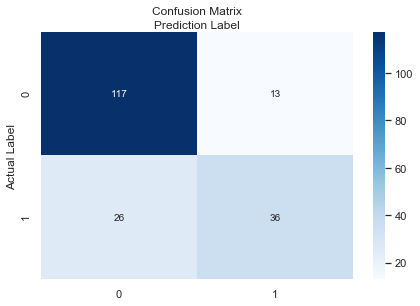

In [10]:
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [11]:
metrics.accuracy_score(y_test, y_pre)

0.796875

# -------------------

In [12]:
def plot_data(X, y):   #plot our data (X,y)
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  color=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [13]:
def plot_decision_region(X, pred_fun):      # Function to visualize the decision surface of our algorithm.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [14]:
def list_cm(cm,classes):     #function to generate the confusion matrix in a more visual way
    if len(cm)==2:
        row_0 =['','Value','True']
        row_1 =['-',classes[0],classes[1]]
        row_2 =[classes[0],cm[0,0],cm[1,0]]
        row_3 =[classes[1],cm[0,1],cm[1,1]]
        table = zip(row_0,row_1, row_2, row_3)
        headers = ['', '', 'Value', 'Predicted']  
        return print(tabulate(table, headers=headers, floatfmt=".4f"))
    else:
        row_0 =['','Value','True','']
        row_1 =['-',classes[0],classes[1],classes[2]]
        row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
        row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
        row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
        table = zip(row_0,row_1, row_2, row_3, row_4)
        headers = ['', '', 'Value', 'Predicted', '']  
        return print(tabulate(table, headers=headers, floatfmt=".4f"))   

## Logistic regression

Logistic regression is a linear model for classification. It is also known as a logit regression or maximum entropy classifier. Given a vector of characteristics $ x $ for a specific example, we have to:

* We can set a prediction function $ f: \mathbb{R}^{2} \rightarrow \mathbb{R} $ such that:

$$ \textrm {Prediction} (x) = \begin {cases}
C_{1} & \mbox{if} f (x) \ge \theta \\
C_{2} & \mbox{if} f (x) <\theta
\end {cases} $$

* We will use a function $ f $ as a logistic model of the parameters $ w $ and $ w_0 $:

$$ f_w (x) = P (C_1 | x) = \sigma (wx + w_0) $$

where
$$ \sigma(x) = \frac {1} {1 + e ^ {- x}} $$

* The logistics function behaves as follows:

<img src = "https://drive.google.com/uc?export=view&id=1aOQjJBQfvs_3e6d1WX_jPFD51-EAqWxn">
Figure: logistic2.svg

The objective of the model is to adjust the coefficients of $ f $ in order to correctly predict the class of each example

## Data set

We use scikit learn's `make_blobs` function to generate a synthetic dataset:

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
print(X.shape)
print(y.shape)
y

(100, 2)
(100,)


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

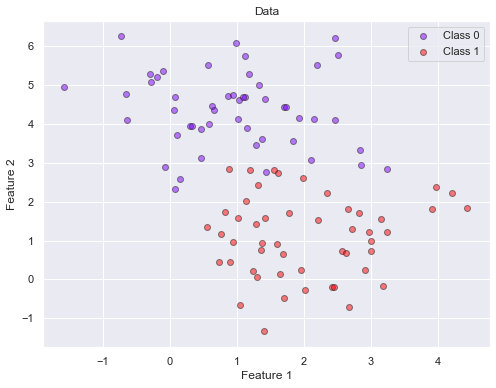

In [16]:
pl.figure(figsize=(8, 6))
pl.xlabel('Feature 1')
pl.ylabel('Feature 2')
plot_data(X, y)

## Training a LogisticRegression model using Scikit-Learn


<img src = "https://drive.google.com/uc?export=view&id=1nnjm7QQh-uIFcPpn0NjQ8EIbYR4Meji2">
Figure: Scikit-learn.svg

All the classification models supported by Scikit-Learn follow the workflow presented in the graphic above. During the session we will work on the training and prediction part. In the next session the workflow will be completed by reviewing the generalization part. Scikit-Learn allows us to train automatic prediction models through a very consistent API. The logistic regression implementation is found using `sklearn.linear_model.LogisticRegression`.

In [17]:
classifier = LogisticRegression(solver='lbfgs', max_iter=200)
cl2 = LogisticRegression(C=1.5)

In [18]:
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# If you want to know the parameters of the estimator you are training, you can call the function `classifier.get_params ()`.
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Explanation of the parameters:

The following is a description of the most important parameters of the logistic regression model using Scikit-Learn:

* $ C $: regularization parameter. Although the concept of overfitting will be discussed in the next session, $ C $ penalizes models that fit the dataset too much.
* $ class \_weight $: In case the classification problem is unbalanced, that is, there are more elements of one class than the other, we can give greater weight to those samples from the class with the fewest number of examples.
* $ n \_jobs $: Number of processes to use to parallelize the training process. -1 Use all available processors minus 1.
* $ solver $: `{‘ newton-cg ’,‘ lbfgs ’,‘ liblinear ’,‘ sag ’,‘ saga ’}`. This parameter corresponds to the algorithm used for optimization. The implementation of `liblinear` is written in C ++ and is one of the most used. `sag` and` saga` fall into a descending gradient implementation known as `Stochastic Average Gradient`.

In [20]:
classifier.predict(X)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [21]:
classifier.score(X, y)

0.94

Next, we find the decision surface. In this two-class classification case, `LogisticRegression` returns a prediction that can be $ 1 $ or $ -1 $.

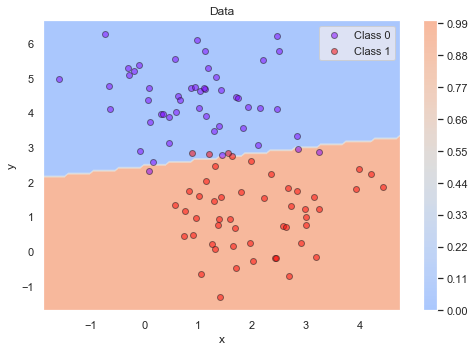

In [22]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier))
plot_data(X, y)

# Bayesian classification

Naive Bayes classifiers are based on Bayesian classification methods. That is, they are based on Bayes' theorem, which describes the relationship of the conditional probabilities of statistical quantities. In this case, we want to estimate the probability that an example with characteristics $ x = (x_1, x_2, \dots, x_n) $ belongs to a given class **C**: $ P (C | x_1, x_2, \dots , x_n) $.

Through Bayes' theorem it can be expressed in terms of quantities that we can calculate more directly:

$$ P (C | x_1, x_2, \dots, x_n) = \frac {P (x_1, x_2, \dots, x_n | C) P (C)} {P (x_1, x_2, \dots, x_n)} $$

* If we are trying to decide between two classes, called $ C_1 $ and $ C_2 $, we choose the class with the highest probability. For example, yes

$$ P (C_1 | x_1, x_2, \dots, x_n) \ge P (C_2 | x_1, x_2, \dots, x_n) $$

the most reasonable prediction is $ C_1 $.

The Naive Bayes classifier (or naive Bayesian classifier) ​​makes a strong assumption: that the characteristics are conditionally independent given the class. That is to say:
$$ P (x_1, x_2, \dots, x_n | C) = P (x_1 | C) P (x_2 | C) \dots P (x_n | C) $$

## Gaussian Classifier Naive Bayes
We graph again the data used in the previous classifier:

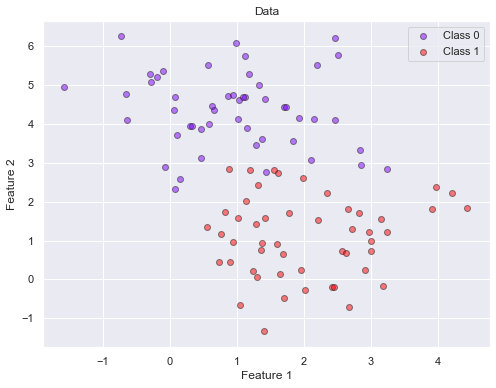

In [23]:
pl.figure(figsize=(8, 6))
pl.xlabel('Feature 1')
pl.ylabel('Feature 2')
plot_data(X, y)

An extremely quick way to create a simple model is to assume that the data is described using a Gaussian distribution with no covariance between the dimensions. This procedure is implemented in Scikit-Learn's using **sklearn.naive_bayes.GaussianNB estimator**:

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X, y);

Now let's generate some new data and forecast the class it belongs to, as follows:

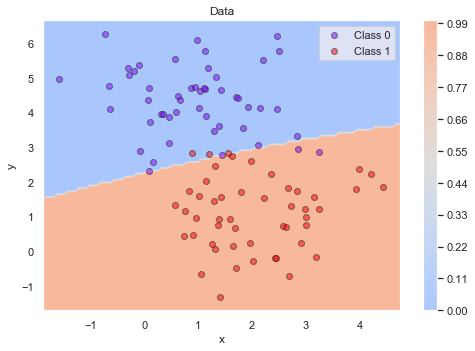

In [25]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier2))
plot_data(X, y)

We see a slightly curved limit in the rankings; In general, the limit in the Gaussian Naive Bayes classifier is quadratic. If we want to know the probability of each element to be classified in a given class, we can easily calculate it using the **predict_proba** method:

In [26]:
classifier.score(X,y)

0.94

In [27]:
yprob = classifier2.predict_proba(X)
yprob[-8:].round(2)

array([[0.11, 0.89],
       [0.  , 1.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.06, 0.94]])

Evaluating our classifier to compare it with the previous one we obtain:

In [28]:
classifier2.score(X, y)

0.95

# Classification of the IRIS data set:

## Data upload for Scikit-Learn

The data in Scikit-Learn is assumed to be stored in a two-dimensional array, the size of which is [n_samples, n_characteristics]. Although many of Scikit's algorithms receive [sparse matrices] (http://www.scipy-lectures.org/advanced/scipy_sparse/index.html) from SciPy of the same size.

- `n_samples`: The number of samples. Each sample is an item to process, in this case to classify. A sample consists of an image, a document, a video, a row in a database.
- `n_characteristics`: The number of characteristics or traits that are used to describe each item quantitatively. These characteristics are generally continuous values, although they can also be boolean or discrete values.

The number of characteristics is established in advance, they can even be of a high dimensionality. In summary, in the two-dimensional array each row will correspond to an example in the data set and each column will correspond to an associated feature.

## IRIS dataset.

In [29]:
iris = datasets.load_iris()

In [30]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* `data`: Contains the data matrix described in the previous section.
* `target`: The labels of each of the instances of the data set (Rows of the array).
* `target_names`: These are the names associated with the labels.
* `feature_names`: Names of associated features.

We find that the number of samples and characteristics of `data` is:

In [32]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


We observe that each row corresponds to a specimen of a species of flower. Each flower has associated a series of characteristics, such as the width and length of the sepal, and the width and length of the petal.

<img src = "https://drive.google.com/uc?export=view&id=1TB-7jzOkgnA-EAnDFWJgIzyb0fbY89XH">
Figure: iris_petal_sepal.png

We can manually inspect the characteristics of the last element of the dataset:

In [33]:
print(list(zip(iris.feature_names, iris.data[-1])))

[('sepal length (cm)', 5.9), ('sepal width (cm)', 3.0), ('petal length (cm)', 5.1), ('petal width (cm)', 1.8)]


Verify that `iris.target` is the same size as the number of samples in` iris.data`

In [34]:
print(iris.target.shape)

(150,)


The species we are trying to predict are:

In [35]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The distribution of elements by label is distributed in the data set, that is, there is the same number of flowers per species:

In [36]:
print(list(zip(iris.target_names, np.bincount(iris.target))))

[('setosa', 50), ('versicolor', 50), ('virginica', 50)]


### Visualization using Pandas

Pandas' scatter_matrix` function allows us to visualize each element of the dataset as a comparison between characteristics:
* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)

Next we compare each pair of features using `scatter_matrix`:

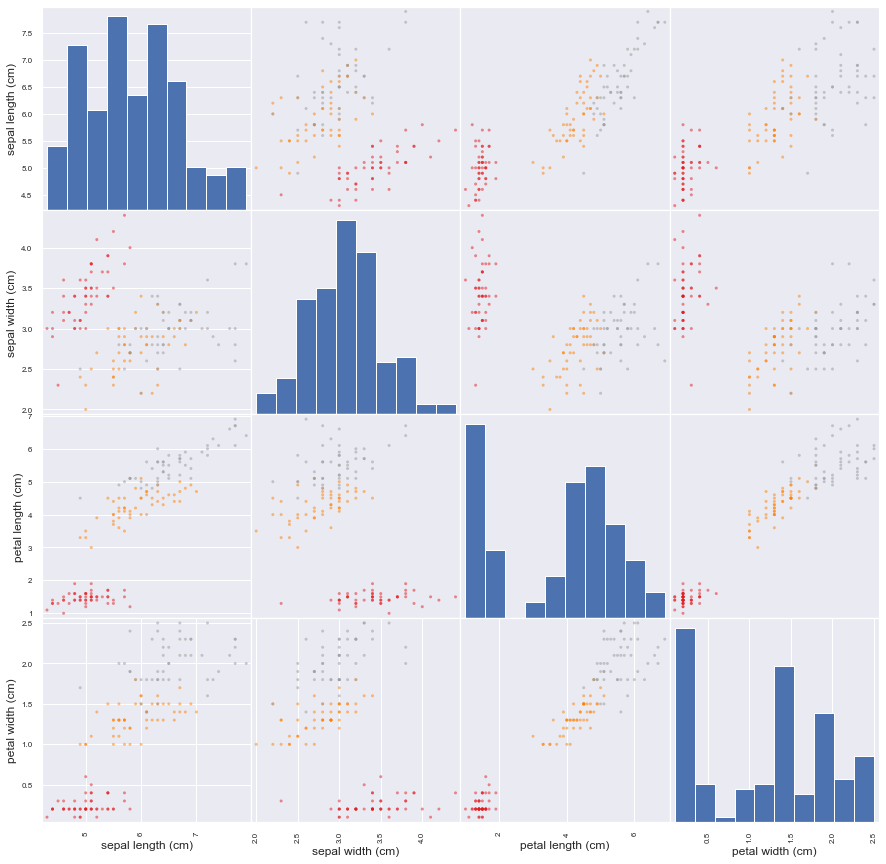

In [37]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap='Set1', figsize=(15, 15));

We found that the class represented in red is the Iris Setosa class.

## Binary classification using Scikit-Learn

Now that we know the IRIS dataset, we want to train a model that is capable of automatically classifying any flower represented in a dataset (Petal width (cm), sepal length (cm) ', petal length (cm ) ', petal width (cm)). As in the previous demo, we filter those flowers that belong to the versicolor and virginica class. To check which columns correspond to the length of the sepal and the width of the petal, we print `feature_names`

In [38]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
X = iris.data[:,[0, 3]] # Column 0: sepal length, Column 3: petal width
y = iris.target

X = X[(y == 1) | (y == 2)] # We filter class 1 and 2 that correspond to versicolor and virginica.
y = y[(y == 1) | (y == 2)] 

y = y - 1 # So that the classes are between 0 and 1

In [40]:
y.shape

(100,)

We train the `LogisticRegression` model and verify the predicted values. `LogisticRegression` is a linear model, which means it will create a decision that is linear in the input space. That is, it finds a line that separates the data.

In [41]:
classifier = LogisticRegression()
classifier.fit(X, y)
predictions = classifier.predict(X)

print('Number of instances to predict: {}'.format(y.shape[0]))
print('Truth values: {}'.format(y))
print('Predicted values: {}'.format(predictions))

Number of instances to predict: 100
Truth values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Question**
* How do we evaluate the performance of our classifier?

# Performance evaluation - Binary classification

In order to know the performance of our classifier, how many predictions were correct are measured quantitatively. This number is known as **accuracy**.

In [42]:
prediction = classifier.predict(X)
np.mean(prediction == y)

0.9

Scikit allows us to also evaluate the accuracy with the `.score ()` function.

In [43]:
classifier.score(X, y)

0.9

### confusion matrix

However, it is desirable to know which classes you rank best. In order to visualize this information, we will use the confusion matrix, which is a special class of contingency table in which the real classes are compared against the classes predicted by the classifier. Scikit-Learn allows us to build the confusion matrix using `sklearn.metrics.confusion_matrix`. `confusion_matrix` receives as argument two lists or NumPy arrays:
* $ and $: Actual dataset labels
* $ \hat {y} $: Tags predicted by the classifier on the dataset

In [44]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
prediction = classifier.predict(X)
cnf_matrix = confusion_matrix(y, prediction)

`confusion_matrix` returns an array of size [$ \textit {n_classes} $, $ \textit {n_classes} $], where $ \textit {n_classes} $ corresponds to the number of unique classes in the dataset. The confusion matrix allows us to compare the performance of our classifier by class.

In [45]:
print(cnf_matrix)

[[46  4]
 [ 6 44]]


Next, we are going to use the function defined at the beginning to generate the confusion matrix in a more visual way.

In [46]:
class_names = iris.target_names[1:]
list_cm(cnf_matrix,class_names)

                   Value       Predicted
-----  ----------  ----------  -----------
       -           versicolor  virginica
Value  versicolor  46          4
True   virginica   6           44


### **How to interpret it?**

* The values on the diagonal indicate the successes of our classifier. For example, we know that of 50 examples of the versicolor class, he knew how to classify 46. While of 50 examples of the virginica class, he was wrong in 6.
* Accuracy and error can be defined from the confusion matrix:

In [47]:
acc = np.sum([cnf_matrix[i, i] for i in range(cnf_matrix.shape[0])])/np.sum(cnf_matrix)

print('Accuracy: {}'.format(acc))

Accuracy: 0.9


In [48]:
err = np.sum([cnf_matrix[0, 1], cnf_matrix[1, 0]])/np.sum(cnf_matrix)

print('Error: {}'.format(err))

Error: 0.1


### What happens when the problem is unbalanced?

Suppose a classifier $ G $ with the following performance on a dataset:

* $ Accuracy = \frac {99} {100} = 99 \% $
* $ Error = \frac {1} {100} = 1 \% $

**Is it a good classifier?**

To effectively measure whether $ G $ is a good classifier, we present the confusion matrix from its predictions.

In [49]:
class_names = ['C_+', 'C_-']
y_pred = np.ones(100)
y_test = np.ones(100)
y_test[-1] = 0
mat = confusion_matrix(y_test, y_pred)
list_cm(mat,class_names)

            Value    Predicted
-----  ---  -------  -----------
       -    C_+      C_-
Value  C_+  0        1
True   C_-  0        99


Although the model correctly classified 99 samples from the negative class, it failed to classify the only positive sample from the data set.

### Precision, Recall and F1
The confusion matrix allows us to calculate another series of measures to evaluate the performance of the classifier. To introduce these measures, we are going to decompose the confusion matrix into four parts:

<img src = "https://drive.google.com/uc?export=view&id=1NwaZST2l_A8ohWZCdYt15zXq3rP0dbrw">


The components of this matrix can be interpreted as:
* TP: True positives. Correct result for the positive class.
* TN: True negatives. Correct absence for the positive class.
* FP: False positives. Unexpected results.
* FN: False negatives. Missing results.

It is worth clarifying that in binary classification, the terms *positive* or *negative* refer to the prediction of the classifier (Class), while *true* or *false* refer to whether the prediction was correct or not.

From this matrix we can rewrite the definitions of accuracy and error:
* $ accuracy = \frac {TP + TN} {TP + FN + FP + TN} $
* $ error = \frac {FP + FN} {TP + FN + FP + TN} $

As well as the definitions of precision, recall and f1 score:

* $ PRE = \frac {TP} {TP + FP} $
* $ REC = \frac {TP} {FN + TP} $
* $ F_1 = 2 * \frac {PRE * REC} {PRE + REC} $

Accuracy can be defined as the ability of the classifier to **not** classify a sample as positive when it is negative. While the recall (recovery index) can be defined as the ability of the classifier to find all positive samples. $ F_1 \textit {score} $ is defined as the weighted average of precision and recall. Let's evaluate the precision and recovery rate of our classifier $ G $:

* $ PRE = \frac {0} {0} $ = Not defined
* $ REC = \frac {0} {1} = 0 \% $ Recall

Scikit-learn provides different functions to calculate these three measurements. We are going to measure the performance on the classifier $ G $

In [50]:
from sklearn import metrics

print('Precision: {}'.format(metrics.precision_score(y_test, y_pred, pos_label=0 )))
print('Recall: {}'.format(metrics.recall_score(y_test, y_pred,  pos_label=0)))
print('F_1 score: {}'.format(metrics.f1_score(y_test, y_pred,  pos_label=0)))

Precision: 0.0
Recall: 0.0
F_1 score: 0.0


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The `pos_label` parameter indicates which label corresponds to the positive class. For our example we have taken the class $ 0 $ as the positive class. On the other hand, the `Warning` generated by Scikit-Learn corresponds to the fact that the measure could not be calculated correctly, due to the presence of a denominator in $ 0 $, therefore $ 0 $ is assigned to the measure. These measures indicate that the classifier $ G $ is not the best option to solve the problem.

### Accuracy, recall and F1 on IRIS
Returning to the binary classification problem on IRIS, we can calculate precision, recall and F1 in the same way:

In [51]:
print('Precision: {}'.format(metrics.precision_score(y, prediction)))
print('Recall: {}'.format(metrics.recall_score(y, prediction)))
print('F_1 score: {}'.format(metrics.f1_score(y, prediction)))

Precision: 0.9166666666666666
Recall: 0.88
F_1 score: 0.8979591836734694


## Multiclass classification

**How to extend to a solution that involves more than two classes?**

There are two solutions:
* One against the rest (One vs All). For this, we follow the following steps:
     * We built a classifier using logistic regression $ h_\theta ^ {(i)} (x) $ for each class $ i $, in which we try to predict the probability that $ y = i $
     * When a new example $ x $ arrives, we choose what class $ i $ to maximize:
$$ \max_{i} h_\theta ^ {(i)} (x) $$

<img src = "https://drive.google.com/uc?export=view&id=1WhINPmEOyH3ClCtmuPL9TogOan31k7Tk">

Source: https://www.coursera.org/learn/machine-learning/lecture/68Pol/multiclass-classification-one-vs-all

To indicate that the multiclass classification strategy is "*One vs Rest*", we modified the `multi_class` parameter in the call to` LogisticRegression () `.

In [52]:
X = iris.data[:,[0, 2]] 
y = iris.target

classifier_ovr = LogisticRegression(multi_class='ovr')
classifier_ovr.fit(X, y)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Below we visualize the decision function for the multiclass problem.

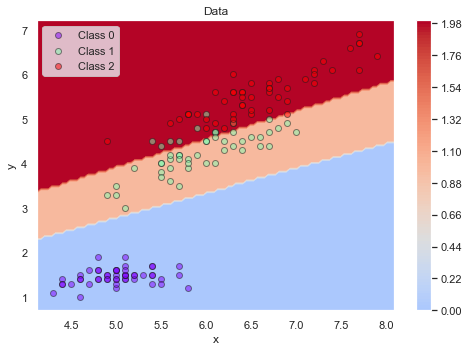

In [53]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier_ovr))
plot_data(X, y)

* Multinomial logistic regression:
     The logistic function can be generalized so that it learns a probability distribution over all classes. This function is known as the **SoftMax** function. For this, $ P (y = i \mid \mathbf {x}) $ can be written like this:
$$ P (y = i \mid \mathbf {x}) = {\frac {e ^ {\mathbf {x} ^ {\mathsf {T}} \mathbf {w}_{i}}} {\sum_{k = 1} ^ {K} e ^ {\mathbf {x} ^ {\mathsf {T}} \mathbf {w}_{k}}}} $$
where $ x $ corresponds to my feature vector, $ K $ to the number of classes and $ w $ to the coefficients of the function $ wx + w_0 $ for the class $ i $.

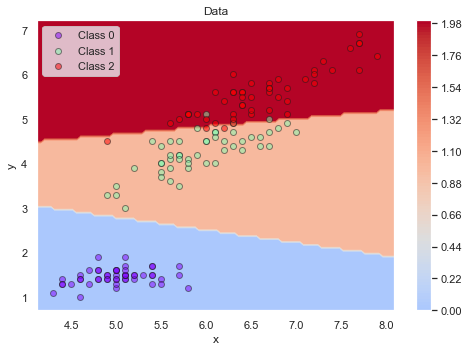

In [54]:
classifier_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs');
classifier_multi.fit(X, y)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier_multi))
plot_data(X, y)

## Performance evaluation - Multiclass case

The confusion matrix can be extended to the multiclass problem as follows:

### Confusion matrix in the multiclass case

First, we will visualize the confusion matrix for the multinomial logistic regression model.

In [55]:
class_names = iris.target_names
y_pred = classifier_multi.predict(X)
mat = confusion_matrix(y, y_pred)
list_cm(mat,class_names)

                   Value    Predicted
-----  ----------  -------  -----------  ---------
       -           setosa   versicolor   virginica
Value  setosa      50       0            0
True   versicolor  0        47           3
       virginica   0        3            47


Now we calculate the confusion matrix for the logistic regression method using the strategy "*One against all*"

In [56]:
class_names = iris.target_names
y_pred = classifier_ovr.predict(X)
mat = confusion_matrix(y, y_pred)
list_cm(mat,class_names)

                   Value    Predicted
-----  ----------  -------  -----------  ---------
       -           setosa   versicolor   virginica
Value  setosa      50       0            0
True   versicolor  0        40           10
       virginica   0        1            49


At a glance we can mention that:
* The *setosa* class is easy to classify for both classifiers.
* Although the model using "*One vs. All*" performs better in the *virginica* class, it performs poorly in the *versicolor* class, compared to the model using multinomial logistic regression.

Again, it is useful to use a performance measure to quantitatively compare the performance of both models.

### Accuracy multiclass

Multiclass accuracy is defined as the fraction of correct predictions from the classifier. It can be calculated from the following formula:

$$
\texttt {acc} (y, \hat {y}) = \frac {1} {n} \sum_{i = 0} ^ {n-1} 1 (\hat {y}_i = y_i)
$$

where $ and $ corresponds to the truth tag list of our data set, while $ \hat {y} $ corresponds to the values ​​predicted by our classifier for the same data set and **in the same order**. $ n $ corresponds to the example number in the set. Scikit-Learn allows us to calculate the accuracy in the same way:

In [57]:
print('Accuracy OVR classifier: {}'.format(classifier_ovr.score(X, y)))
print('Accuracy Multinomial classifier: {}'.format(classifier_multi.score(X, y)))

Accuracy OVR classifier: 0.9266666666666666
Accuracy Multinomial classifier: 0.96


The logistic regression model performs better against the "*One vs. All*" model. Error can be defined as the fraction of incorrect classifier predictions:

In [58]:
print('Error OVR classifier: {}'.format(1-classifier_ovr.score(X, y)))
print('Error Multinomial classifier: {}'.format(1-classifier_multi.score(X, y)))

Error OVR classifier: 0.07333333333333336
Error Multinomial classifier: 0.040000000000000036


### Precision and recall on multiclass problem

Precision was calculated based on the confusion matrix of the binary classification problem. However, it can be extended as a performance measure for the multiclass problem in several ways. Remember that:

* $ Precision = \frac {TP} {TP + FP} $
* $ Recall = \frac {TP} {TP + FN} $
* $ F_1 = 2 * \frac {PRE * REC} {PRE + REC} $

To illustrate how each of these measures is calculated, we will use the logistic regression classifier with the "*One vs All*" scheme. We first calculate the *precision* for each class and then determine how we combine the accuracies of each class:

| Class | tp | fp | fn | PRE | REC |
| ---------- | ------ | ------ | ------ | ------ | ------ |
| Setosa | 50 | 0 | 0 | 1.0 | 1.0 |
| | | | | | |
| Versicolor | 40 | 0 | 10 | 0.98 | 0.8 |
| | | | | | |
| Virginica | 49 | 0 | 1 | 0.83 | 0.98 |

Scikit-Learn allows us to calculate accuracy by class like so:

In [59]:
from sklearn.metrics import precision_score
y_pred = classifier_ovr.predict(X)
print('Label order: {}'.format(iris.target_names))
print('Accuracy by class: {}'.format(precision_score(y, y_pred, average=None)))

Label order: ['setosa' 'versicolor' 'virginica']
Accuracy by class: [1.         0.97560976 0.83050847]


We add a couple of calculations to our table, where we reflect the sum of the total values ​​of true positives, false positives, and false negatives. There are several ways to combine precision and recall measurements by class:
* `micro`: Counts the total of true positives, false positives and false negatives
* `macro`: Calculate the precision per class and then the average. (Without taking into account the balance of classes)
* `weighted`: Calculate the precision per class and then the average taking into account the class balance

| Class | tp | fp | fn | PRE | REC |
| ---------- | ------ | ------ | ------ | ------ | ------ |
| Setosa | 50 | 0 | 0 | 1.0 | 1.0 |
| | | | | | |
| Versicolor | 40 | 0 | 10 | 0.98 | 0.8 |
| | | | | | |
| Virginica | 49 | 0 | 1 | 0.83 | 0.98 |
| | | | | | |
| Sum (micro) | 139 | 11 | 11 | 0.92 | 0.92 |
| | | | | | |
| Avg (macro) | | | | 0.93 | 0.92 |

In [60]:
print ('Macro precision: {}'. format (precision_score (y, y_pred, average = 'macro')))
print ('Micro precision: {}'. format (precision_score (y, y_pred, average = 'micro')))
print ('Heavy precision: {}'. format (precision_score (y, y_pred, average = 'weighted')))

Macro precision: 0.9353727435579441
Micro precision: 0.9266666666666666
Heavy precision: 0.9353727435579441


As we observed, these values correspond to the last two rows that were calculated on the precision and recall table. It is worth noting that `weighted` and` macro` are the same for class balance. This can be extended to the calculation of the recall and the $ F_1 \textit {score} $. Recall that the $ F_1 \textit {score} $ is a weighted average of the precision and the recall.

In [61]:
from sklearn.metrics import recall_score, f1_score

print ('Recall macro: {}'. format (recall_score (y, y_pred, average = 'macro')))
print ('Recall micro: {}'. format (recall_score (y, y_pred, average = 'micro')))
print ('Recall heavy: {}'. format (recall_score (y, y_pred, average = 'weighted')))

print ('F1 macro: {}'. format (f1_score (y, y_pred, average = 'macro')))
print ('F1 micro: {}'. format (f1_score (y, y_pred, average = 'micro')))
print ('F1 heavy: {}'. format (f1_score (y, y_pred, average = 'weighted')))

Recall macro: 0.9266666666666667
Recall micro: 0.9266666666666666
Recall heavy: 0.9266666666666666
F1 macro: 0.9260678159760728
F1 micro: 0.9266666666666666
F1 heavy: 0.9260678159760729
